# Pre-Human Activity Recognition

## Data Exploration

### Sample

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [2]:
sample_train = pd.read_csv('./datasets/train/Jogging/1.csv')

In [3]:
sample_train

,x-axis,y-axis,z-axis
0,4.48,14.18,-2.11
1,3.95,12.26,-2.68
2,6.05,9.72,-1.95
3,5.24,7.21,-5.56
4,7.27,5.79,-6.51
...,...,...,...
11051,-13.57,-6.21,1.95
11052,-12.07,-3.60,2.03
11053,-9.28,-4.75,-0.65
11054,-5.86,-5.20,4.90


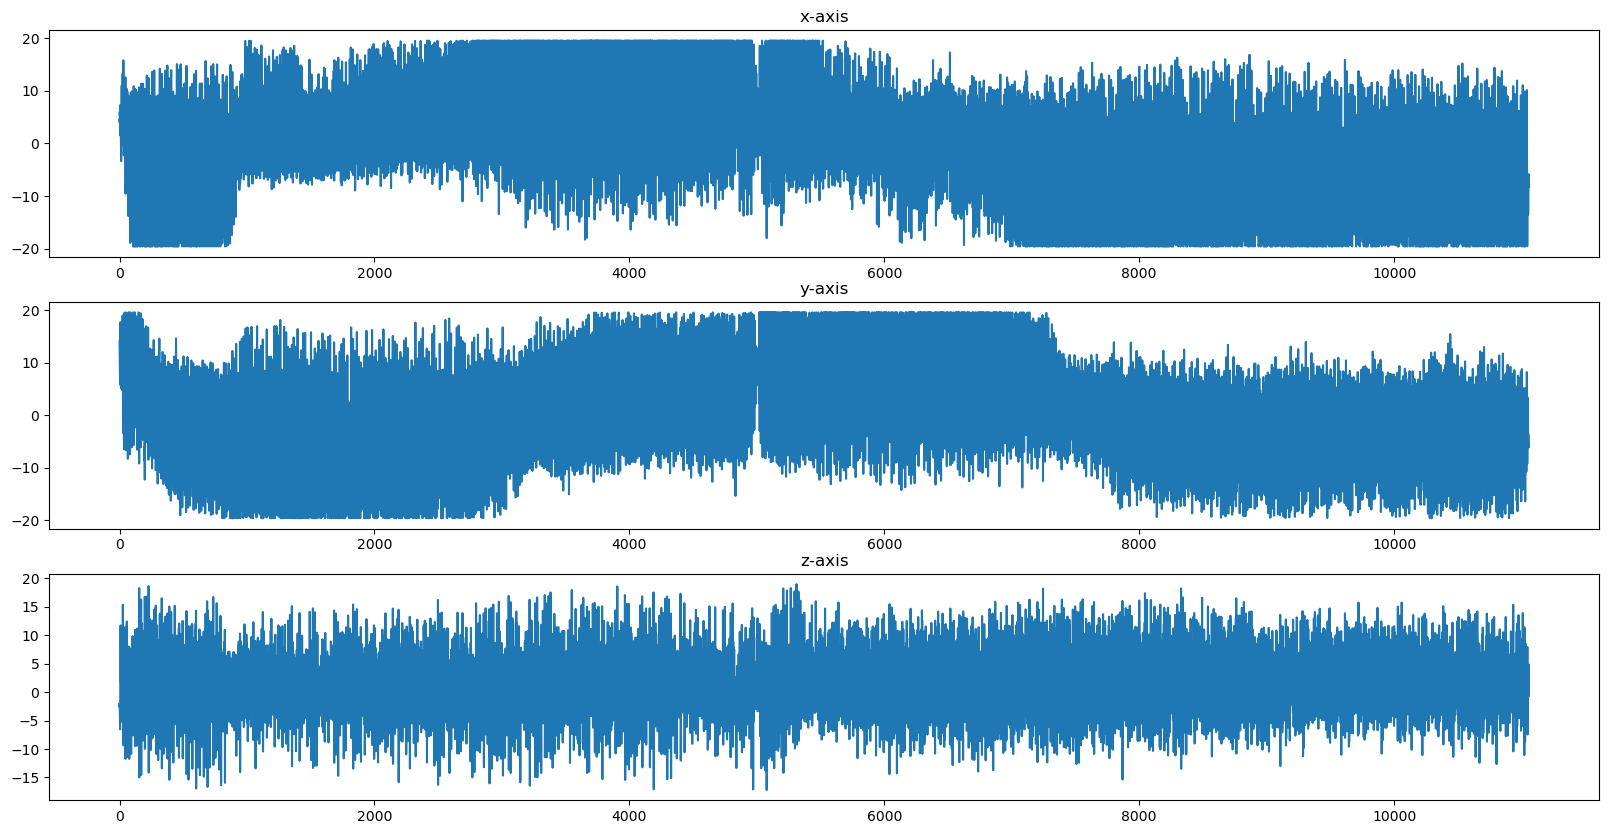

In [4]:
fig , axes = plt.subplots(3 , 1 , figsize = (20 , 10))

for idx , col in enumerate (sample_train.columns) :
    
    axes[idx].plot(sample_train[col])
    axes[idx].set_title(col)

plt.show()

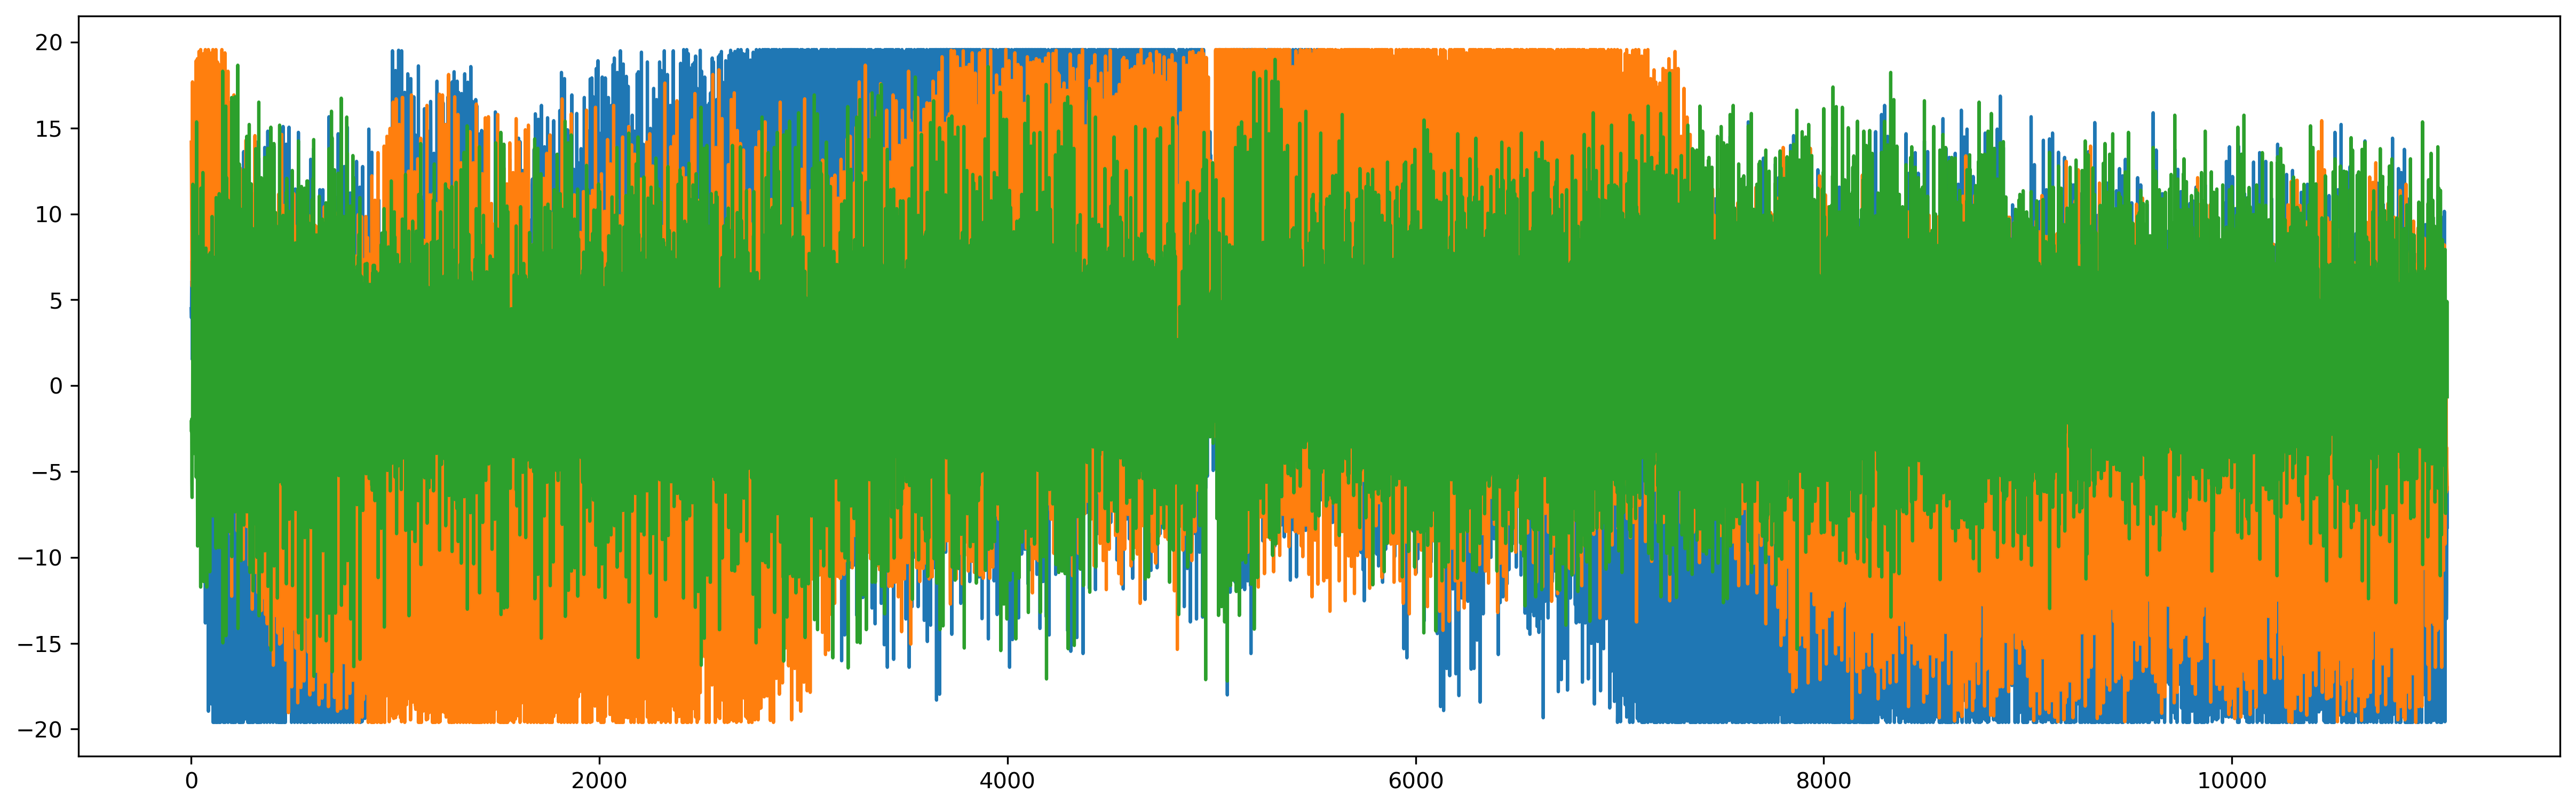

In [5]:
figure(figsize=(20 , 6), dpi=300)

for idx , col in enumerate (sample_train.columns) :
    
    plt.plot(sample_train[col])

plt.show()

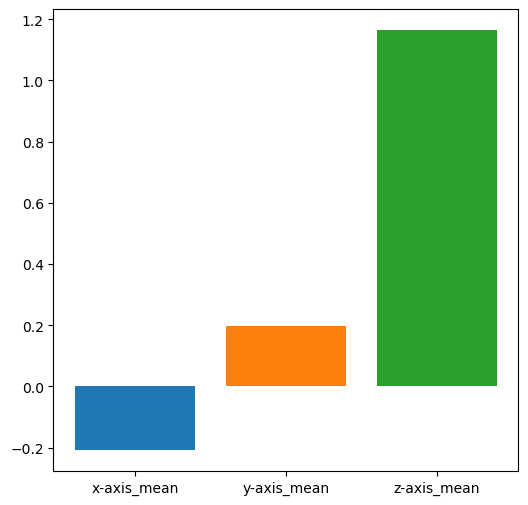

In [6]:
figure(figsize=(6 , 6), dpi=100)

for idx , col in enumerate(sample_train.columns):
    
    plt.bar(f'{col}_mean' , sample_train[col].mean())
    
plt.show()

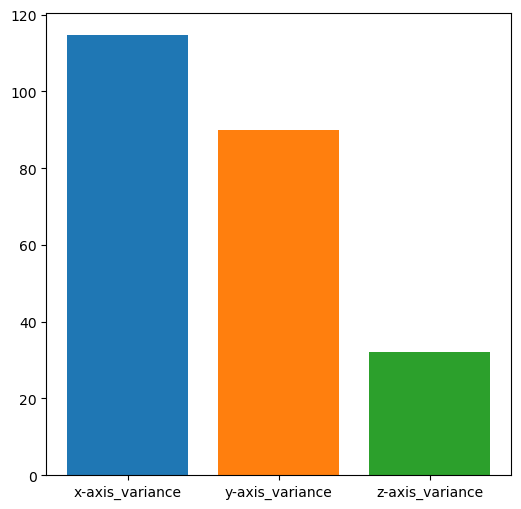

In [7]:
figure(figsize=(6 , 6), dpi=100)

for idx , col in enumerate(sample_train.columns):
    
    plt.bar(f'{col}_variance' , sample_train[col].var())
    
plt.show()

6.693198263386396


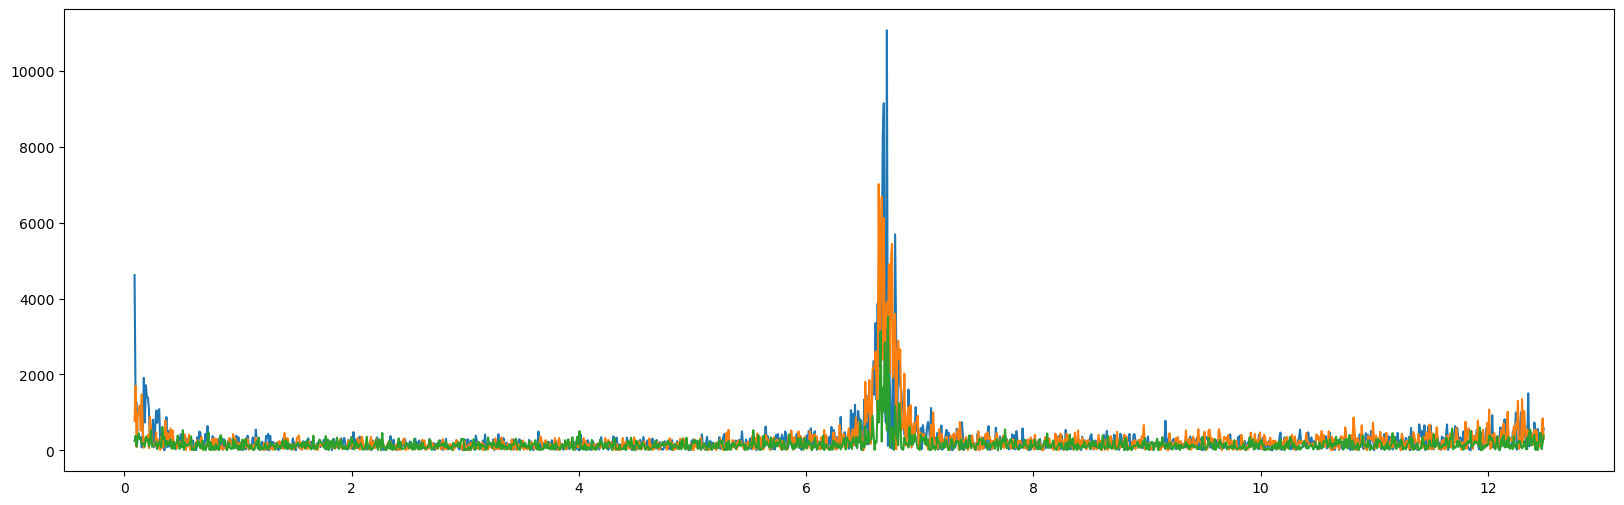

In [8]:
figure(figsize=(20 , 6), dpi=100)

for idx , col in enumerate (sample_train.columns) :
    
    mag = np.fft.fft(sample_train[col])
    freq = np.fft.fftfreq(len(sample_train[col])) * 100
    
    plt.plot(freq[10:len(freq) // 8] , np.abs(mag.real[10:len(freq) // 8]))

print(freq[mag.real[10:len(freq) // 8].argmax() + 10])
plt.show()

### All Classes

In [9]:
import glob
import os
from matplotlib.pyplot import figure

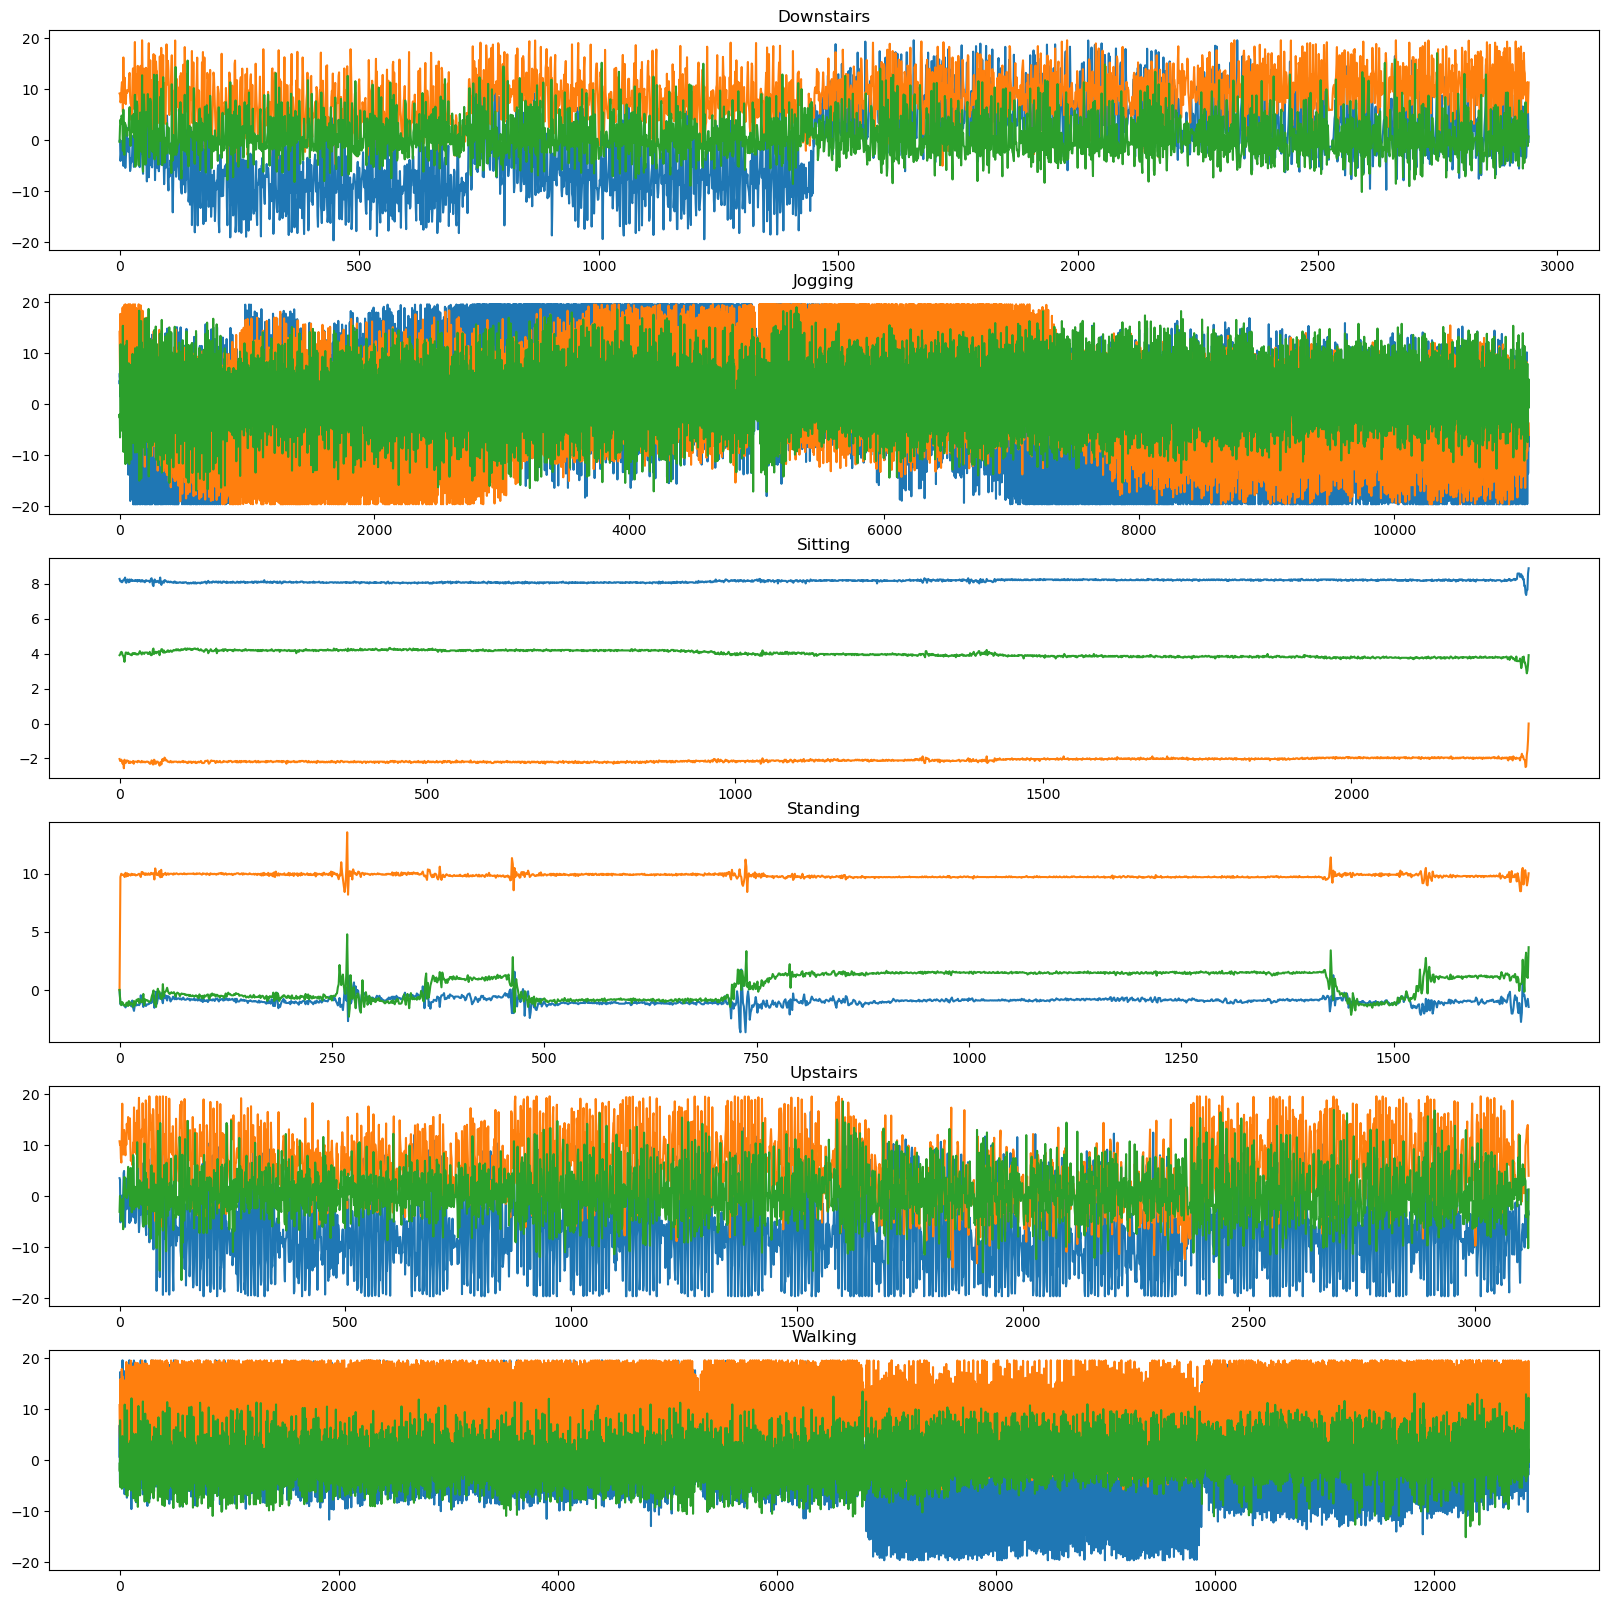

In [10]:
fig , axes = plt.subplots(6 , 1 , figsize = (20 , 20))

for row , class_ in enumerate(os.listdir('./datasets/train')) :
    
    file = glob.glob(f'./datasets/train/{class_}/*')[0]
    
    df = pd.read_csv(file)
    
    for col in df.columns :
        
        axes[row].plot(df[col])
        axes[row].set_title(class_)

plt.show()

In [11]:
labels = os.listdir('./datasets/train')

class_means = {
    'x_mean' : [] ,
    'y_mean' : [] ,
    'z_mean' : []
}

for row , class_ in enumerate(os.listdir('./datasets/train')) :
    
    file = glob.glob(f'./datasets/train/{class_}/*')[0]
    
    df = pd.read_csv(file)
    
    class_means['x_mean'].append(df['x-axis'].mean())
    class_means['y_mean'].append(df['y-axis'].mean())
    class_means['z_mean'].append(df['z-axis'].mean())
    

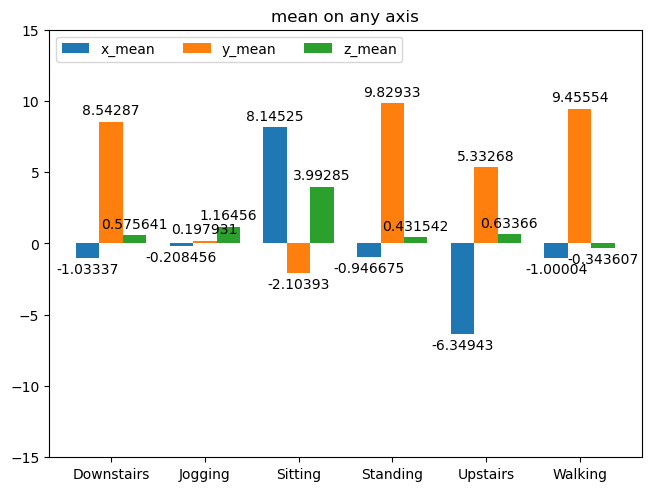

In [12]:
x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in class_means.items():
    
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

ax.set_title('mean on any axis')
ax.set_xticks(x + width, labels)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(-15, 15)

plt.show()

In [13]:
labels = os.listdir('./datasets/train')

class_means = {
    'x_var' : [] ,
    'y_var' : [] ,
    'z_var' : []
}

for row , class_ in enumerate(os.listdir('./datasets/train')) :
    
    file = glob.glob(f'./datasets/train/{class_}/*')[0]
    
    df = pd.read_csv(file)
    
    class_means['x_var'].append(df['x-axis'].var())
    class_means['y_var'].append(df['y-axis'].var())
    class_means['z_var'].append(df['z-axis'].var())
    

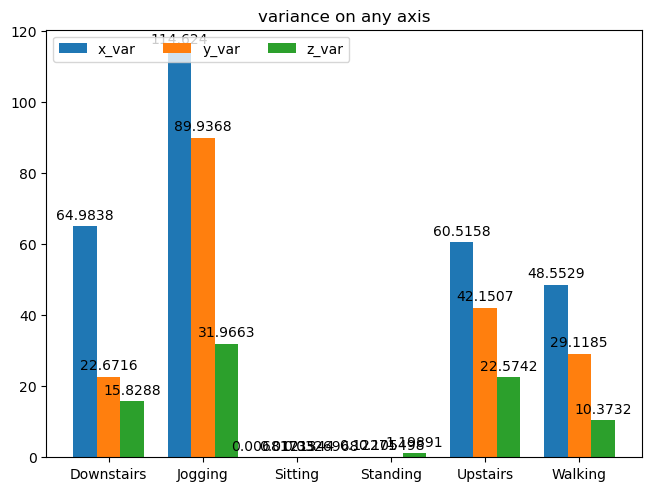

In [14]:
x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in class_means.items():
    
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

ax.set_title('variance on any axis')
ax.set_xticks(x + width, labels)
ax.legend(loc='upper left', ncols=3)

plt.show()

## Cutting Dataframe & Features Engineering

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [16]:
def raw_to_features(df , index) :
    
    freq = np.fft.fftfreq(len(df['x-axis'])) * 100
    
    start = 5
    divide = 2
    
    result_df = pd.DataFrame({
        
        'x_mean' : df['x-axis'].mean() ,
        'y_mean' : df['y-axis'].mean() ,
        'z_mean' : df['z-axis'].mean() ,
        
        'x_var' : df['x-axis'].var() ,
        'y_var' : df['y-axis'].var() ,
        'z_var' : df['z-axis'].var() ,
        
        'x_std' : df['x-axis'].std() ,
        'y_std' : df['y-axis'].std() ,
        'z_std' : df['z-axis'].std() ,
        
        'x_fourier_mean' : np.abs(np.fft.fft(df['x-axis'])[start:len(df['x-axis']) // divide]).real.mean() , 
        'y_fourier_mean' : np.abs(np.fft.fft(df['y-axis'])[start:len(df['x-axis']) // divide]).real.mean() , 
        'z_fourier_mean' : np.abs(np.fft.fft(df['z-axis'])[start:len(df['x-axis']) // divide]).real.mean() , 

        'x_fourier_var' : np.abs(np.fft.fft(df['x-axis'])[start:len(df['x-axis']) // divide]).real.var() , 
        'y_fourier_var' : np.abs(np.fft.fft(df['y-axis'])[start:len(df['x-axis']) // divide]).real.var() , 
        'z_fourier_var' : np.abs(np.fft.fft(df['z-axis'])[start:len(df['x-axis']) // divide]).real.var() , 
        
        'x_fourier_std' : np.abs(np.fft.fft(df['x-axis'])[start:len(df['x-axis']) // divide]).real.std() , 
        'y_fourier_std' : np.abs(np.fft.fft(df['y-axis'])[start:len(df['x-axis']) // divide]).real.std() , 
        'z_fourier_std' : np.abs(np.fft.fft(df['z-axis'])[start:len(df['x-axis']) // divide]).real.std() , 

        'x_max_mag' : freq[np.abs(np.fft.fft(df['x-axis'])[start:len(df['x-axis']) // divide]).real.argmax() + start],
        'y_max_mag' : freq[np.abs(np.fft.fft(df['y-axis'])[start:len(df['y-axis']) // divide]).real.argmax() + start],
        'z_max_mag' : freq[np.abs(np.fft.fft(df['z-axis'])[start:len(df['z-axis']) // divide]).real.argmax() + start],
        
        
    }, index = [index])
    
    return result_df

In [17]:
idx = 0

for file_path in glob.glob('./datasets/train/*/*') :
    
    label = file_path.split('\\')[-2]
    
    df = pd.read_csv(file_path)
    
    size = len(df)
    
    for i in range(0 , size , 200) :
        
        if (i + 200 < size) :
            
            raw_df = df.iloc[i : i + 200]
            
            featured_df = raw_to_features(raw_df , idx)
            featured_df['label'] = label
            featured_df.to_csv(f'./database/{idx}.csv' , index=False)
            
            idx += 1

In [18]:
train_df = pd.concat(pd.read_csv(file_path) for file_path in glob.glob('./database/*'))
train_df.index = pd.Series(np.arange(len(train_df)))
train_df.index.name = 'id'
train_df

,x_mean,y_mean,z_mean,x_var,y_var,z_var,x_std,y_std,z_std,x_fourier_mean,...,x_fourier_var,y_fourier_var,z_fourier_var,x_fourier_std,y_fourier_std,z_fourier_std,x_max_mag,y_max_mag,z_max_mag,label
id,,,,,,,,,,,,,,,,,,,,,
0,-4.39750,8.90680,1.389650,25.810094,22.525089,19.192804,5.080364,4.746060,4.380959,51.152435,...,1437.239306,1268.887730,1007.050953,37.910939,35.621450,31.734066,14.5,8.0,26.0,Downstairs
1,-8.76790,5.62450,0.933900,26.374634,25.742803,13.433873,5.135624,5.073737,3.665225,59.799193,...,1875.721303,1724.330596,716.097453,43.309598,41.525060,26.759997,16.5,8.5,25.0,Downstairs
2,7.23115,8.61640,0.341000,28.094825,20.508925,17.733355,5.300455,4.528678,4.211099,58.613428,...,2402.367894,1410.727307,919.969213,49.013956,37.559650,30.330994,13.5,13.5,27.0,Downstairs
3,-3.96520,8.85685,0.245098,9.834684,16.591653,10.823620,3.136030,4.073285,3.289927,38.569872,...,509.880091,1047.480302,480.355684,22.580525,32.364800,21.917018,32.0,10.0,9.5,Downstairs
4,-8.59630,0.71960,0.811550,39.912708,18.343870,23.281242,6.317651,4.282974,4.825064,60.222952,...,4673.331299,1133.421314,1320.986891,68.361768,33.666323,36.345383,14.0,7.0,14.5,Jogging
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4339,-8.61600,1.92880,-0.615550,39.130460,24.638608,26.879138,6.255434,4.963729,5.184509,55.188943,...,5050.567915,2360.942088,1876.413588,71.067348,48.589527,43.317590,15.0,15.0,15.0,Jogging
4340,-7.35705,2.03125,-0.164250,47.009992,30.132750,38.744479,6.856383,5.489331,6.224506,69.241595,...,4990.497057,2173.933046,2982.530154,70.643450,46.625455,54.612546,15.0,15.0,15.0,Jogging
4341,-8.00275,1.71985,-0.266400,42.787779,27.020510,34.822281,6.541237,5.198126,5.901041,61.610729,...,4984.499368,2790.931844,2933.296988,70.600987,52.829271,54.159920,14.0,14.5,14.0,Jogging


In [19]:
test_df = pd.concat( raw_to_features(pd.read_csv(file_path), 0) for file_path in sorted(glob.glob('./datasets/test/*')))

test_df.index = pd.Series( file_path.split('\\')[-1] for file_path in sorted(glob.glob('./datasets/test/*')))
test_df.index.name = 'id'

test_df

,x_mean,y_mean,z_mean,x_var,y_var,z_var,x_std,y_std,z_std,x_fourier_mean,...,z_fourier_mean,x_fourier_var,y_fourier_var,z_fourier_var,x_fourier_std,y_fourier_std,z_fourier_std,x_max_mag,y_max_mag,z_max_mag
id,,,,,,,,,,,,,,,,,,,,,
003d40b5-56ed-43cc-a4cc-5c901d542afc.csv,2.39936,10.388035,0.818855,43.475710,58.527467,18.922114,6.593611,7.650325,4.349956,82.525927,...,53.058504,2089.249532,2805.095259,1041.894154,45.708309,52.963150,32.278385,47.0,30.0,37.5
004c721f-2a5c-45ca-9faa-54b0c5e2188b.csv,6.74630,7.317400,-0.721129,58.475221,80.586670,21.104929,7.646909,8.977008,4.594010,77.478173,...,51.892363,6120.474836,9691.230321,1318.938009,78.233464,98.444047,36.317186,7.0,13.5,7.0
005af30b-08f6-4695-9509-41a9f2722c2e.csv,0.00970,9.875150,1.399500,0.006664,0.000961,0.002682,0.081635,0.030996,0.051790,0.581881,...,0.502671,0.149889,0.046110,0.091230,0.387155,0.214732,0.302044,13.0,45.5,3.0
00975e94-b081-4c14-962f-026acc55d9f3.csv,-0.73565,9.738100,1.403236,7.089229,21.149181,12.143635,2.662561,4.598824,3.484772,27.070521,...,35.917562,739.944155,2064.830323,1249.661512,27.201915,45.440404,35.350552,15.5,10.0,20.5
00dccf4d-375c-4d95-9441-7ff0d3687314.csv,-0.27845,9.693250,1.684360,6.514619,18.163603,10.351878,2.552375,4.261878,3.217433,26.185688,...,32.383000,661.574893,1727.490277,1105.581489,25.721098,41.563088,33.250286,25.0,10.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fe7c2cc3-606f-461d-8667-fbb5ceb1ecfb.csv,-1.36900,9.702750,-1.010600,28.751074,37.950511,27.470317,5.362003,6.160399,5.241213,55.248212,...,51.580336,2961.331478,4195.079717,3085.195783,54.418117,64.769435,55.544539,5.5,10.5,16.0
fe96f6d3-4c66-414e-bdce-71cb988c83de.csv,-1.34450,9.523400,2.111222,0.058381,0.012570,0.040355,0.241621,0.112117,0.200886,2.088863,...,1.283861,3.163286,0.684713,0.841514,1.778563,0.827474,0.917341,13.0,16.0,13.0
fed2f223-196d-4b5d-b5ae-55e537611b41.csv,-5.65140,6.521700,-1.301500,58.911274,72.145866,18.859573,7.675368,8.493872,4.342761,61.604349,...,48.367037,8435.390693,9573.885679,1373.280053,91.844383,97.846235,37.057793,13.0,13.0,19.5


## Model Inference

In [20]:
from autogluon.tabular import TabularPredictor

In [21]:
label = 'label'

In [22]:
predictor = TabularPredictor(label = label).fit(train_df)

No path specified. Models will be saved in: "AutogluonModels\ag-20240717_151105"
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets.
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='best_quality'   : Maximize accuracy. Default time_limit=3600.
	presets='high_quality'   : Strong accuracy with fast inference speed. Default time_limit=3600.
	presets='good_quality'   : Good accuracy with very fast inference speed. Default time_limit=3600.
	presets='medium_quality' : Fast training time, ideal for initial prototyping.
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels\ag-20240717_151105"
=================== System Info ===================
AutoGluon Version:  1.1.0
Python Version:     3.11.7
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.22631
CPU Count:          16
Memory Avail:      

In [23]:
predictor.refit_full()

Refitting models via `predictor.refit_full` using all of the data (combined train and validation)...
	Models trained in this way will have the suffix "_FULL" and have NaN validation score.
	This process is not bound by time_limit, but should take less time than the original `predictor.fit` call.
	To learn more, refer to the `.refit_full` method docstring which explains how "_FULL" models differ from normal models.
Fitting 1 L1 models ...
Fitting model: KNeighborsUnif_FULL ...
	0.01s	 = Training   runtime
Fitting 1 L1 models ...
Fitting model: KNeighborsDist_FULL ...
	0.01s	 = Training   runtime
Fitting 1 L1 models ...
Fitting model: NeuralNetFastAI_FULL ...
No improvement since epoch 2: early stopping
	2.16s	 = Training   runtime
Fitting 1 L1 models ...
Fitting model: LightGBMXT_FULL ...
	1.1s	 = Training   runtime
Fitting 1 L1 models ...
Fitting model: LightGBM_FULL ...
	0.91s	 = Training   runtime
Fitting 1 L1 models ...
Fitting model: RandomForestGini_FULL ...
	0.76s	 = Training   r

{'KNeighborsUnif': 'KNeighborsUnif_FULL',
 'KNeighborsDist': 'KNeighborsDist_FULL',
 'NeuralNetFastAI': 'NeuralNetFastAI_FULL',
 'LightGBMXT': 'LightGBMXT_FULL',
 'LightGBM': 'LightGBM_FULL',
 'RandomForestGini': 'RandomForestGini_FULL',
 'RandomForestEntr': 'RandomForestEntr_FULL',
 'CatBoost': 'CatBoost_FULL',
 'ExtraTreesGini': 'ExtraTreesGini_FULL',
 'ExtraTreesEntr': 'ExtraTreesEntr_FULL',
 'XGBoost': 'XGBoost_FULL',
 'NeuralNetTorch': 'NeuralNetTorch_FULL',
 'LightGBMLarge': 'LightGBMLarge_FULL',
 'WeightedEnsemble_L2': 'WeightedEnsemble_L2_FULL'}

In [24]:
predictor.fit_pseudolabel(test_df)

Given test_data for pseudo labeling did not contain labels. AutoGluon will assign pseudo labels to data and use it for extra training data...
Beginning iteration 1 of pseudolabeling out of max 3
Pseudolabeling algorithm confidently assigned pseudolabels to 6 rows of data on iteration 1. Adding to train data
Fitting 13 L1 models ...
Fitting model: KNeighborsUnif_PSEUDO_1 ...
	0.846	 = Validation score   (accuracy)
	0.01s	 = Training   runtime
	0.07s	 = Validation runtime
Fitting model: KNeighborsDist_PSEUDO_1 ...
	0.85	 = Validation score   (accuracy)
	0.01s	 = Training   runtime
	0.06s	 = Validation runtime
Fitting model: NeuralNetFastAI_PSEUDO_1 ...
	0.96	 = Validation score   (accuracy)
	2.64s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: LightGBMXT_PSEUDO_1 ...
	0.978	 = Validation score   (accuracy)
	1.48s	 = Training   runtime
	0.02s	 = Validation runtime
Fitting model: LightGBM_PSEUDO_1 ...
	0.972	 = Validation score   (accuracy)
	1.19s	 = Training   runtime
	

In [25]:
prediction = predictor.predict(test_df)

In [26]:
prediction

id
003d40b5-56ed-43cc-a4cc-5c901d542afc.csv     Jogging
004c721f-2a5c-45ca-9faa-54b0c5e2188b.csv     Jogging
005af30b-08f6-4695-9509-41a9f2722c2e.csv    Standing
00975e94-b081-4c14-962f-026acc55d9f3.csv     Walking
00dccf4d-375c-4d95-9441-7ff0d3687314.csv     Walking
                                              ...   
fe7c2cc3-606f-461d-8667-fbb5ceb1ecfb.csv     Jogging
fe96f6d3-4c66-414e-bdce-71cb988c83de.csv    Standing
fed2f223-196d-4b5d-b5ae-55e537611b41.csv     Jogging
ffa15772-28a4-4fe2-bd53-d23904d92e58.csv    Upstairs
fff706d6-1408-4d4d-b76d-39ac614d424b.csv     Sitting
Name: label, Length: 693, dtype: object

In [27]:
features_importance = predictor.feature_importance(train_df)
features_importance

Computing feature importance via permutation shuffling for 21 features using 4344 rows with 5 shuffle sets...
	16.51s	= Expected runtime (3.3s per shuffle set)
	10.17s	= Actual runtime (Completed 5 of 5 shuffle sets)


,importance,stddev,p_value,n,p99_high,p99_low
z_mean,0.044613,0.001823,3.336838e-07,5,0.048366,0.040860
y_mean,0.028959,0.001450,7.526420e-07,5,0.031946,0.025973
y_fourier_mean,0.024448,0.001060,4.229288e-07,5,0.026630,0.022265
x_mean,0.017680,0.001275,3.228532e-06,5,0.020306,0.015053
z_fourier_var,0.016713,0.000807,6.514707e-07,5,0.018375,0.015050
z_fourier_std,0.005110,0.000472,8.616864e-06,5,0.006082,0.004139
y_max_mag,0.004696,0.001011,2.428771e-04,5,0.006778,0.002614
x_fourier_var,0.004604,0.000587,3.101247e-05,5,0.005812,0.003396
z_max_mag,0.002624,0.000702,5.599972e-04,5,0.004070,0.001179
z_fourier_mean,0.002486,0.000341,4.163781e-05,5,0.003189,0.001783


In [28]:
features_importance.to_csv('./features/features.csv')

In [29]:
prediction.value_counts()

label
Walking       252
Jogging       210
Upstairs       85
Downstairs     69
Sitting        54
Standing       23
Name: count, dtype: int64

In [30]:
submission_path = './submissions'
prediction.to_csv(f'{submission_path}/submission.csv')

### Evaluation

In [31]:
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
pred = predictor.predict(train_df)
label = train_df['label']

In [33]:
pred.value_counts()

label
Walking       1725
Jogging       1363
Upstairs       481
Downstairs     379
Sitting        217
Standing       179
Name: count, dtype: int64

In [34]:
label.value_counts()

label
Walking       1725
Jogging       1363
Upstairs       481
Downstairs     379
Sitting        217
Standing       179
Name: count, dtype: int64

In [35]:
confusion_matrix = confusion_matrix(pred , label)

In [36]:
confusion_matrix

array([[ 379,    0,    0,    0,    0,    0],
       [   0, 1363,    0,    0,    0,    0],
       [   0,    0,  217,    0,    0,    0],
       [   0,    0,    0,  179,    0,    0],
       [   0,    0,    0,    0,  481,    0],
       [   0,    0,    0,    0,    0, 1725]], dtype=int64)

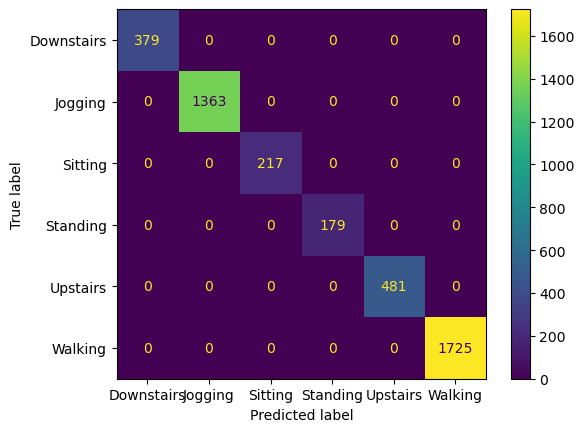

In [37]:
display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix , display_labels = os.listdir('./datasets/train'))
display.plot()

plt.show()